# DATA601
## Project 1
#### Ben Lagnese

In [7]:
import pandas as pd

# Most fields are text, so start there
data = pd.read_csv('data/SEPDATA_FY2020-2024.TXT', dtype=str)

# Convert fields to correct dtypes and fill NaNs
data['EFDATE'] = pd.to_datetime(data['EFDATE'], format='%Y%m')

for column in ('COUNT', 'SALARY', 'LOS'):
    data[column] = pd.to_numeric(data[column])

for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column].fillna(0, inplace=True)
    else:
        data[column].fillna('', inplace=True)
data

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
0,AA00,SJ,2020-06-01,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360.0,12.3
1,AA00,SC,2022-08-01,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300.0,12.9
2,AA00,SC,2022-07-01,H,15,,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300.0,12.8
3,AA00,SA,2020-08-01,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316.0,4.9
4,AA00,SA,2020-03-01,D,15,14,D,11,0905,1,GS-14,N,XXXX,40,F,2,1,149621.0,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717107,ZU00,SA,2021-11-01,K,17,,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800.0,14.5
717108,ZU00,SJ,2021-07-01,E,17,,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930.0,8.1
717109,ZU00,SA,2021-03-01,K,13,,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465.0,8.0
717110,ZU00,SJ,2021-07-01,C,13,,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682.0,2.8


#### Translations

The dataset has most fields as codes tied to specific rows in other files. These rows can have up to 7 columns, but we don't really need all the information they provide so we're just going to grab the one column corresponding to each code to get a readable output. Unfortunately, the text we do want varies in format and position across the files, so each has to be done separately.

In [8]:
import csv
replacements = {col:{} for col in data.columns}
for ignore_col in ('EFDATE', 'GSEGRD', 'COUNT', 'SALARY', 'LOS'):
    del replacements[ignore_col]

# Open each file corresponding to a column and create a dictionary for each code within to map it to its readable text version
with open('data/DTagy.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['AGYSUB'][row[4]] = row[5][5:] if '**' not in row[5] else row[3][3:]

with open('data/DTsep.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['SEP'][row[0]] = row[1]

with open('data/DTagelvl.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['AGELVL'][row[0]] = row[1]

with open('data/DTedlvl.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['EDLVL'][row[2]] = row[3][3:] if '-' in row[3] else row[3]

with open('data/DTedlvl.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['EDLVL'][row[2]] = row[3][3:] if '-' in row[3] else row[3]

with open('data/DTloslvl.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['LOSLVL'][row[0]] = row[1]

with open('data/DTloc.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['LOC'][row[2]] = row[3][3:]

with open('data/DTocc.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['OCC'][row[4]] = row[5][5:] if '-' in row[5] else row[5]

with open('data/DTpatco.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['PATCO'][row[0]] = row[1]

with open('data/DTppgrd.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        row[5] = row[5].replace('"', '')
        replacements['PPGRD'][row[6]] = row[5][3:] if '-' in row[5] else row[5]
        # For some reason not all codes with ** are given in this file, so we have to populate them ourselves just in case.
        if '-' in row[6]:
            wildcard = row[6][:3] + '**'
            if wildcard not in replacements['PPGRD']:
                replacements['PPGRD'][wildcard] = replacements['PPGRD'][row[6]]

with open('data/DTsallvl.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        row[1] = row[1].replace('"', '')
        replacements['SALLVL'][row[0]] = row[1]

with open('data/DTstemocc.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['STEMOCC'][row[4]] = row[5][5:]

with open('data/DTtoa.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['TOA'][row[2]] = row[3][3:] if '-' in row[3] else row[3]

with open('data/DTwrksch.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['WORKSCH'][row[2]] = row[3][2:] if '-' in row[3] else row[3]

with open('data/DTwkstat.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        replacements['WORKSTAT'][row[0]] = row[1]


In [9]:
for key, replace in replacements.items():
    data[key] = data[key].apply(lambda x: replace[x])
data.replace('"', '', inplace=True) # Just in case we missed a few

In [10]:
# data.to_csv('sepdata_format.csv', index=False) # Exporting to csv in case I want to look at actual text fields

In [11]:
data.columns

Index(['AGYSUB', 'SEP', 'EFDATE', 'AGELVL', 'EDLVL', 'GSEGRD', 'LOSLVL', 'LOC',
       'OCC', 'PATCO', 'PPGRD', 'SALLVL', 'STEMOCC', 'TOA', 'WORKSCH',
       'WORKSTAT', 'COUNT', 'SALARY', 'LOS'],
      dtype='object')

Graphing some 1D graphs to get an idea of data trends

In [12]:
import textwrap
import matplotlib.pyplot as plt

col_list = ('AGYSUB', 'SEP', 'AGELVL', 'LOSLVL', 'SALLVL', 'EDLVL', 'LOC', 'OCC')

def render_1d_graph(col, num=10, **kwargs):
    # Sum the counts for each category in the given column to see the top categories in terms of separations
    col_select = data[[col, 'COUNT']].groupby(col).sum().sort_values('COUNT', ascending=False).head(num)
    ax = col_select.plot.bar(legend=False, ylabel='Counts', **kwargs)
    # Text wrapping since some of the names are long
    f = lambda x: textwrap.fill(x.get_text(), 14)
    ax.set_xticklabels(map(f, ax.get_xticklabels()), rotation=50)
    return ax

Generating 1D graphs of highest counts within categories to find interesting datapoints.

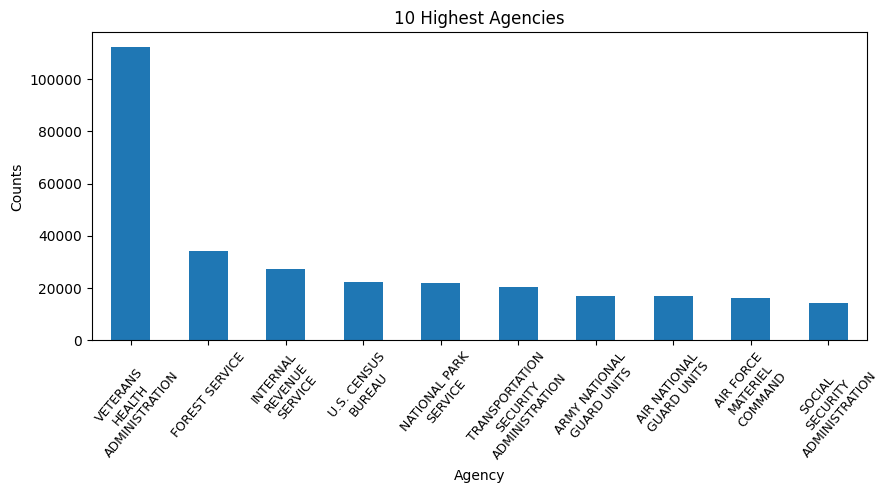

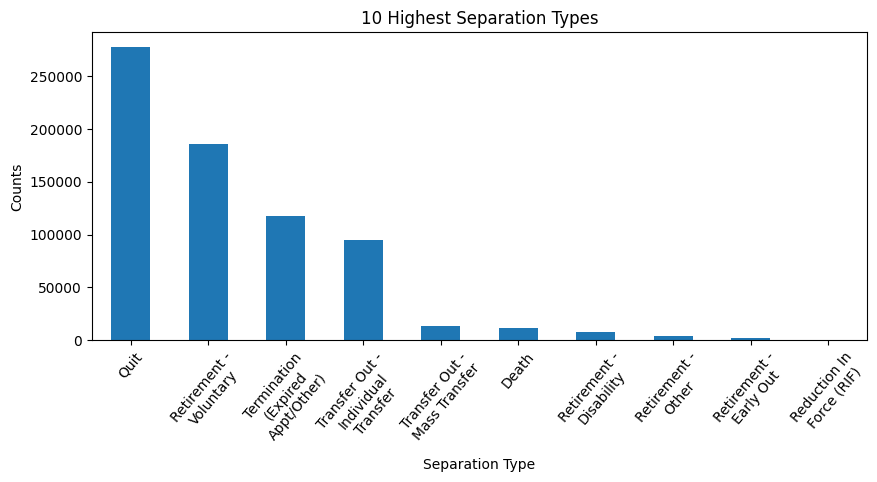

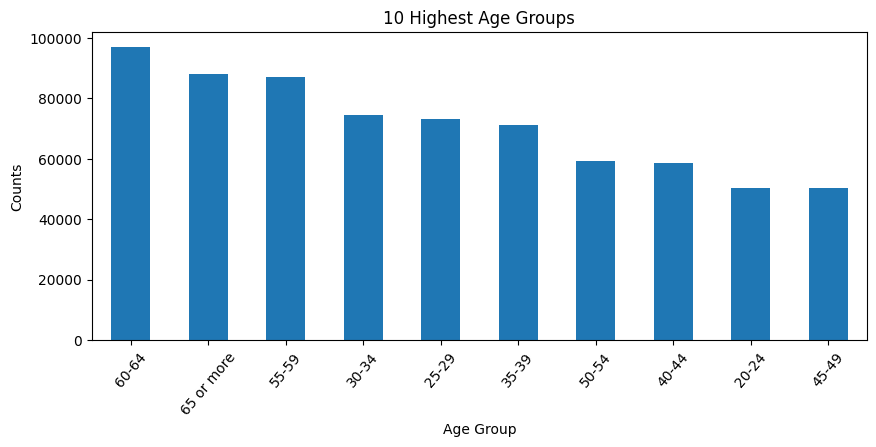

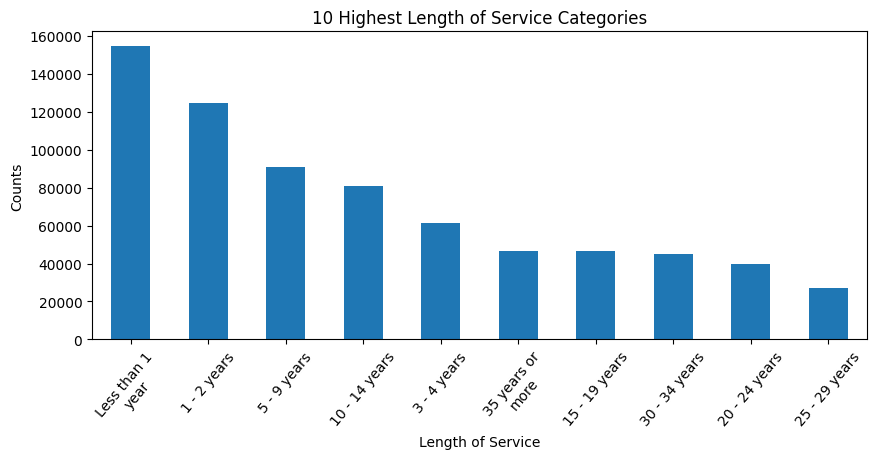

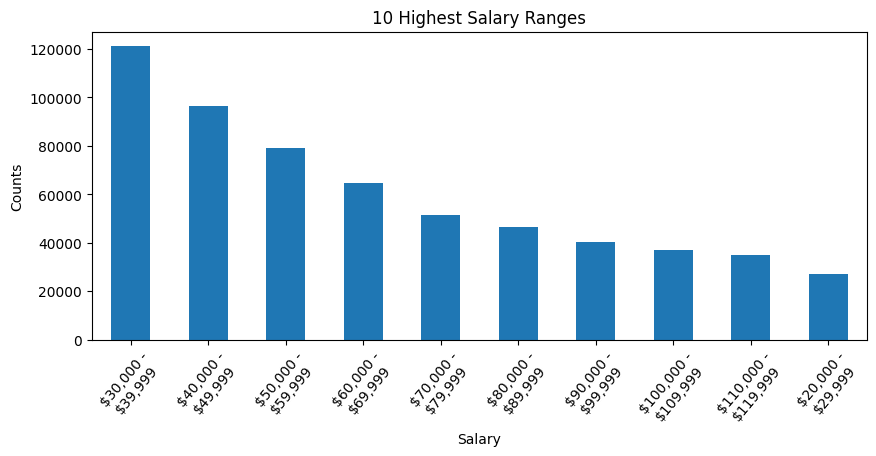

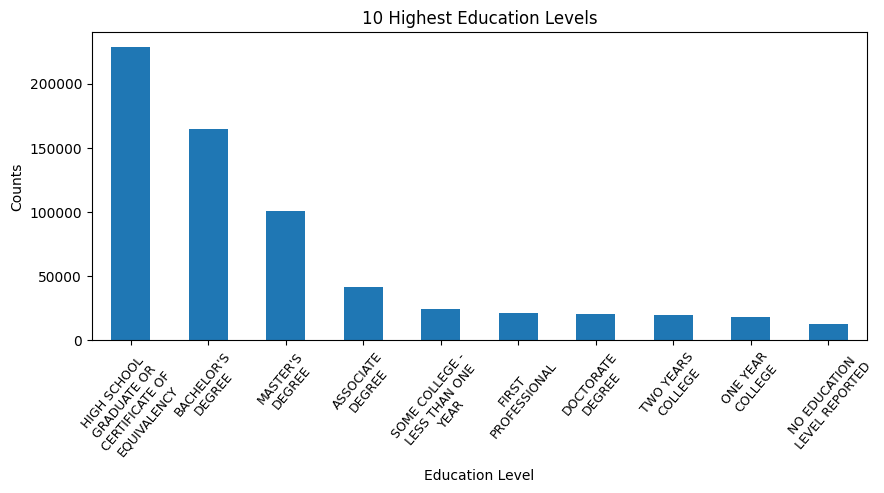

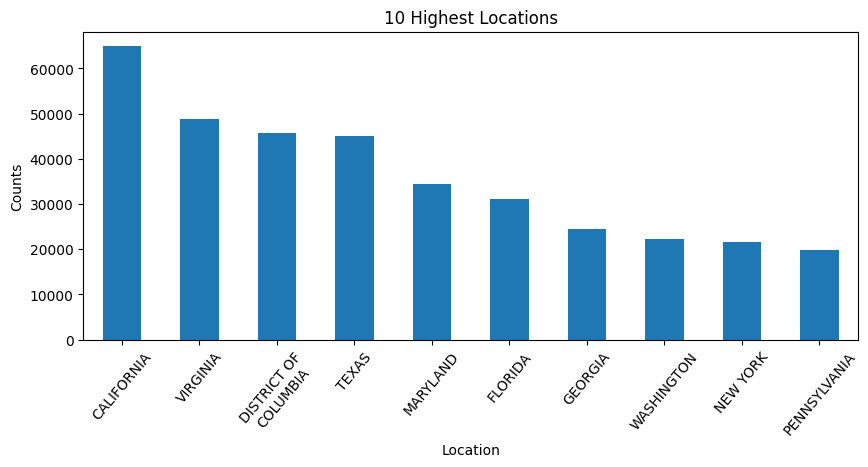

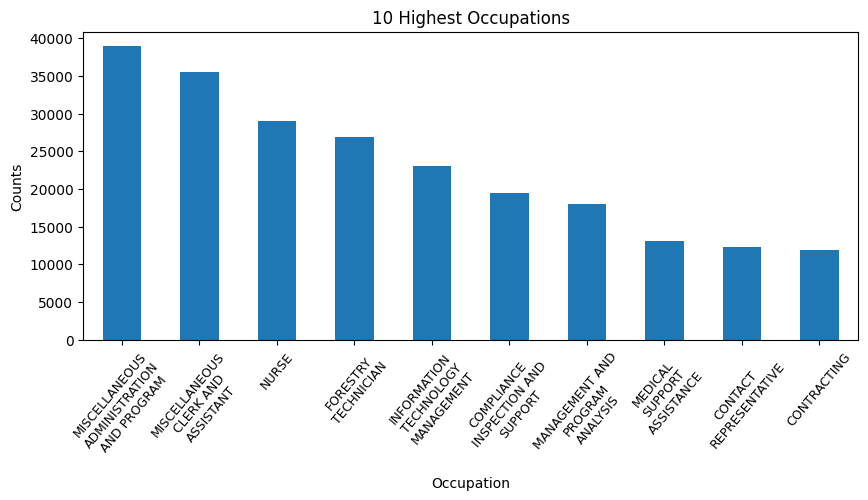

In [99]:
ax = render_1d_graph(col_list[0], figsize=(10, 4), title='10 Highest Agencies', xlabel='Agency')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()
render_1d_graph(col_list[1], figsize=(10, 4), title='10 Highest Separation Types', xlabel='Separation Type')
render_1d_graph(col_list[2], figsize=(10, 4), title='10 Highest Age Groups', xlabel='Age Group')
render_1d_graph(col_list[3], figsize=(10, 4), title='10 Highest Length of Service Categories', xlabel='Length of Service')
render_1d_graph(col_list[4], figsize=(10, 4), title='10 Highest Salary Ranges', xlabel='Salary')
ax = render_1d_graph(col_list[5], figsize=(10, 4), title='10 Highest Education Levels', xlabel='Education Level')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()
render_1d_graph(col_list[6], figsize=(10, 4), title='10 Highest Locations', xlabel='Location')
ax = render_1d_graph(col_list[7], figsize=(10, 4), title='10 Highest Occupations', xlabel='Occupation')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()

In [71]:
def render_relate_graph(base_col, base_select, col, count_label, num=10, **kwargs):
    # Calculate percents each count is of the total for that slice of the data
    col_select = data[data[base_col]==base_select][[col, 'COUNT']].groupby(col).sum()
    col_select['COUNT'] = 100*col_select['COUNT']/col_select['COUNT'].sum()
    all_select = data[[col, 'COUNT']].groupby(col).sum()
    all_select['COUNT'] = 100*all_select['COUNT']/all_select['COUNT'].sum()

    # Group them together to make a stacked bar graph
    group_df = pd.concat(
        [
            all_select.rename({'COUNT': 'All Count %'}, axis=1),
            col_select.rename({'COUNT': count_label + ' Count %'}, axis=1)
        ],
        axis=1
    )

    group_df.sort_values(count_label + ' Count %',inplace=True, ascending=False)
    ax = group_df.head(num).plot.bar(legend=True, ylabel='Count %', **kwargs)
    # Make the longer text less ugly
    f = lambda x: textwrap.fill(x.get_text() if len(x.get_text()) < 40 else x.get_text()[:40] + '...', 14)
    ax.set_xticklabels(map(f, ax.get_xticklabels()), rotation=50)
    return ax

Generating graphs based on specific groups to see variations between them vs the total count and each other.

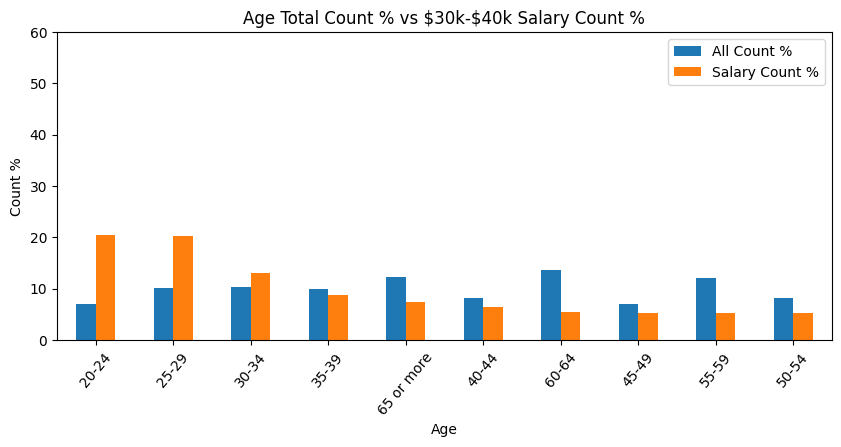

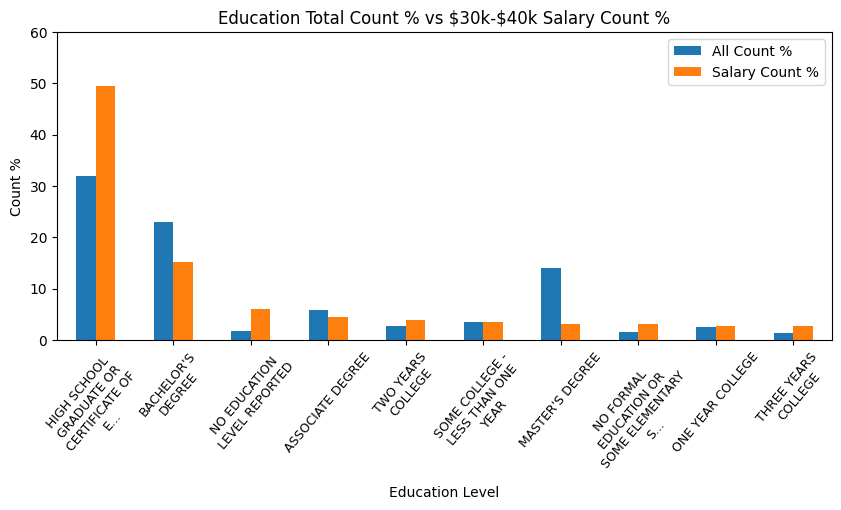

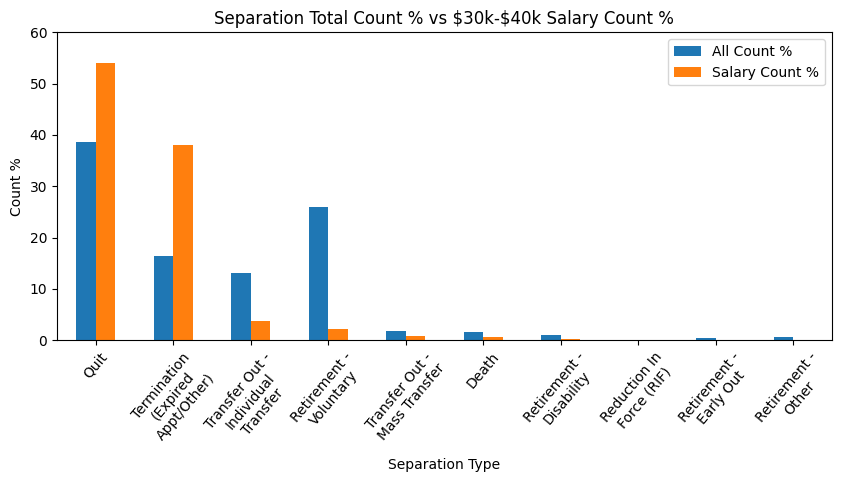

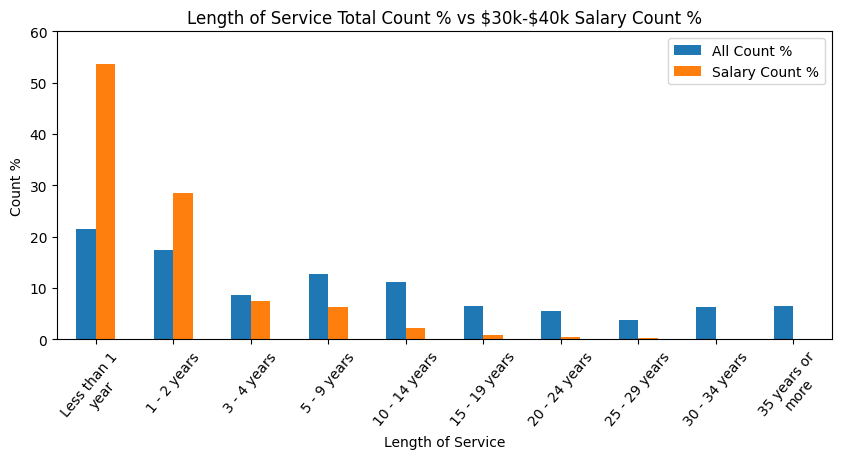

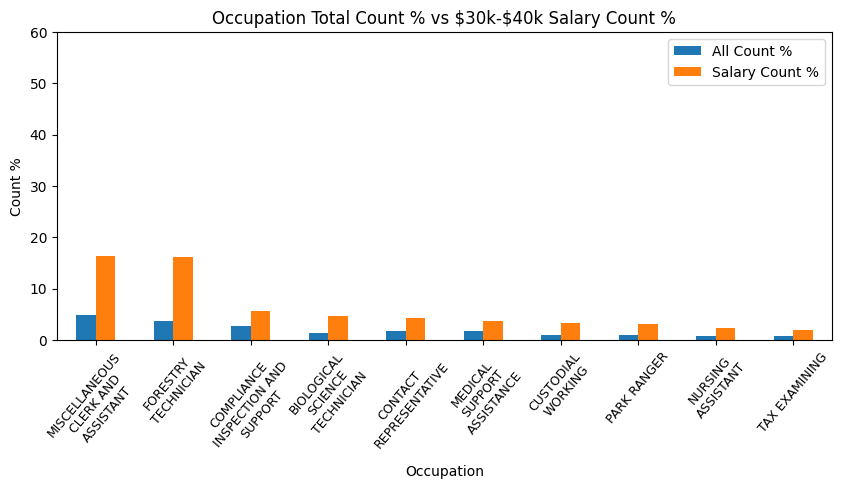

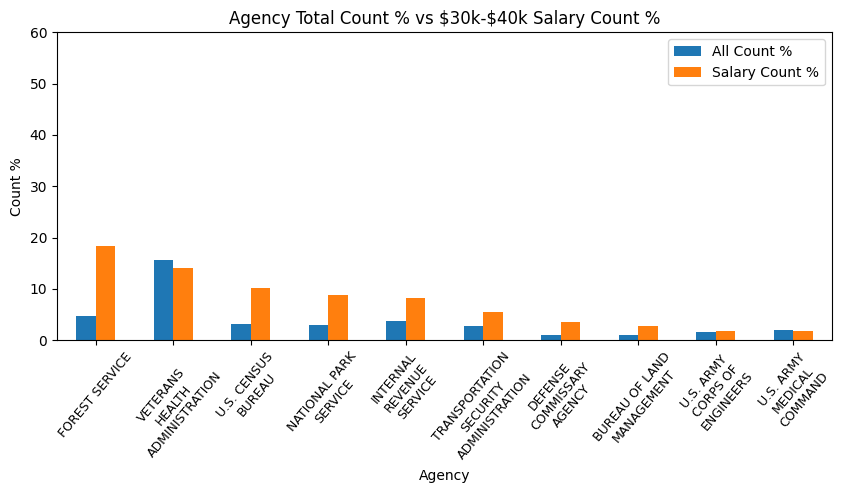

In [72]:
render_relate_graph('SALLVL', '$30,000 - $39,999', 'AGELVL', 'Salary', 10, title='Age Total Count % vs \$30k-$40k Salary Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Age')
ax = render_relate_graph('SALLVL', '$30,000 - $39,999', 'EDLVL', 'Salary', 10, title='Education Total Count % vs \$30k-$40k Salary Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Education Level')
f = lambda x: textwrap.fill(x.get_text(), 16)
ax.set_xticklabels(map(f, ax.get_xticklabels()), fontsize=9, rotation=50)
plt.show()
render_relate_graph('SALLVL', '$30,000 - $39,999', 'SEP', 'Salary', 10, title='Separation Total Count % vs \$30k-$40k Salary Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Separation Type')
render_relate_graph('SALLVL', '$30,000 - $39,999', 'LOSLVL', 'Salary', 10, title='Length of Service Total Count % vs \$30k-$40k Salary Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Length of Service')
ax = render_relate_graph('SALLVL', '$30,000 - $39,999', 'OCC', 'Salary', 10, title='Occupation Total Count % vs \$30k-$40k Salary Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Occupation')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()
ax = render_relate_graph('SALLVL', '$30,000 - $39,999', 'AGYSUB', 'Salary', 10, title='Agency Total Count % vs \$30k-$40k Salary Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Agency')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()

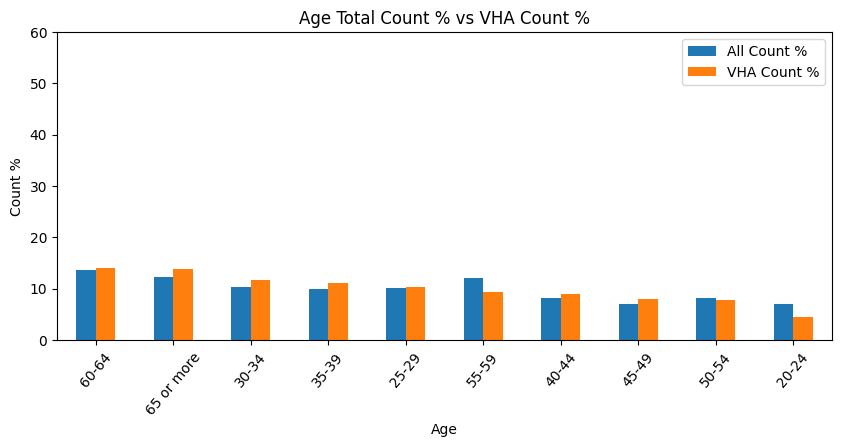

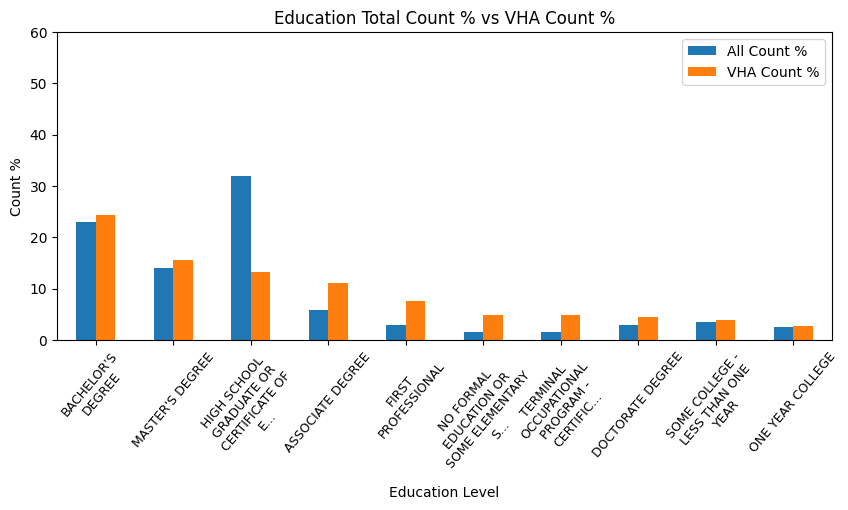

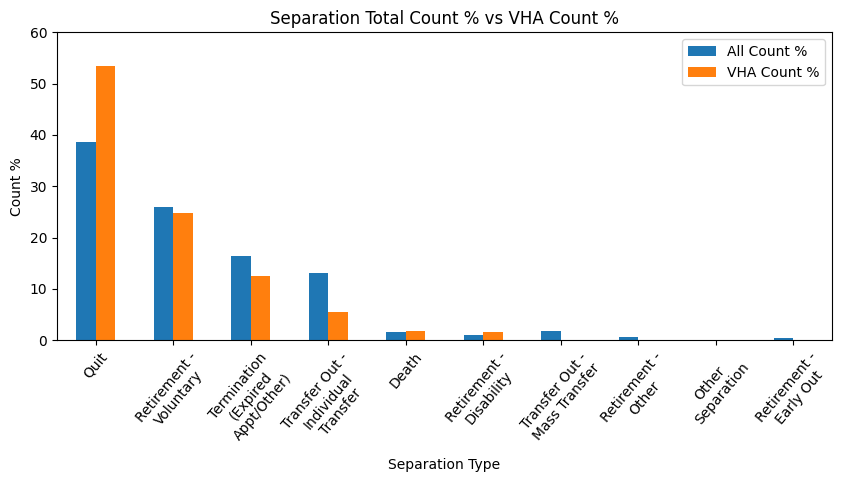

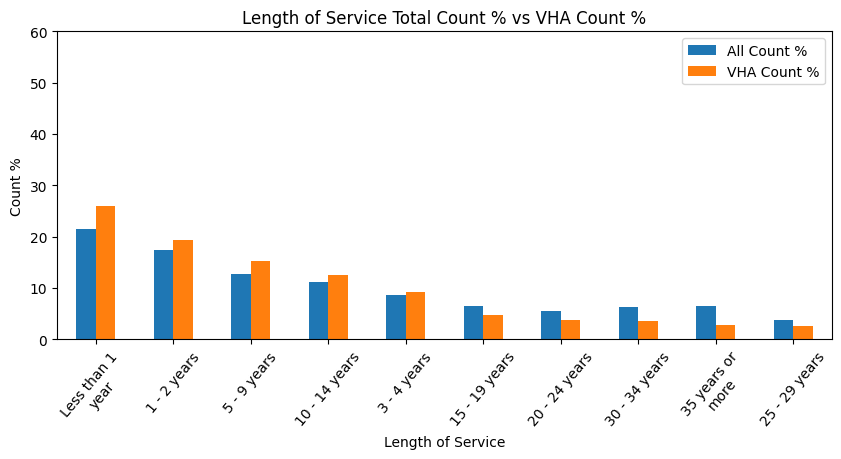

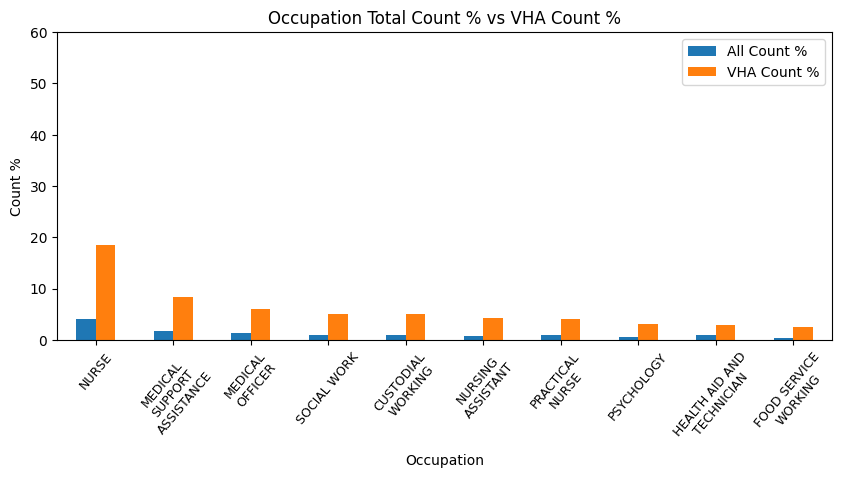

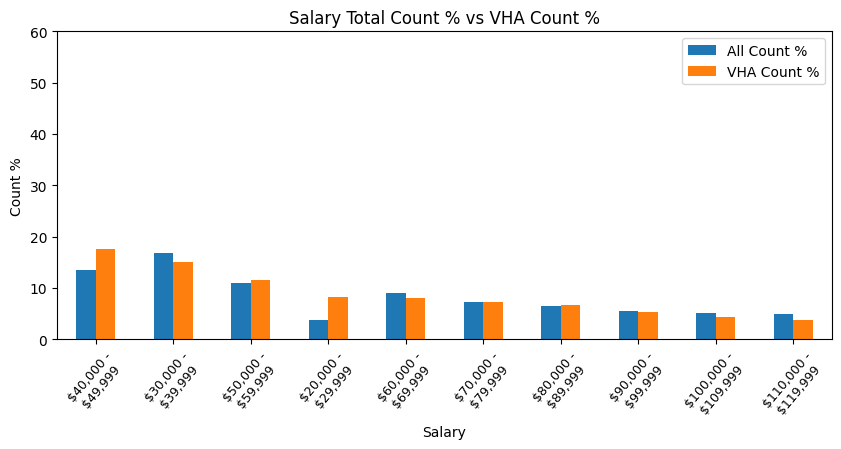

In [73]:
render_relate_graph('AGYSUB', 'VETERANS HEALTH ADMINISTRATION', 'AGELVL', 'VHA', 10, title='Age Total Count % vs VHA Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Age')
ax = render_relate_graph('AGYSUB', 'VETERANS HEALTH ADMINISTRATION', 'EDLVL', 'VHA', 10, title='Education Total Count % vs VHA Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Education Level')
f = lambda x: textwrap.fill(x.get_text(), 16)
ax.set_xticklabels(map(f, ax.get_xticklabels()), fontsize=9, rotation=50)
plt.show()
render_relate_graph('AGYSUB', 'VETERANS HEALTH ADMINISTRATION', 'SEP', 'VHA', 10, title='Separation Total Count % vs VHA Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Separation Type')
render_relate_graph('AGYSUB', 'VETERANS HEALTH ADMINISTRATION', 'LOSLVL', 'VHA', 10, title='Length of Service Total Count % vs VHA Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Length of Service')
ax = render_relate_graph('AGYSUB', 'VETERANS HEALTH ADMINISTRATION', 'OCC', 'VHA', 10, title='Occupation Total Count % vs VHA Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Occupation')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()
ax = render_relate_graph('AGYSUB', 'VETERANS HEALTH ADMINISTRATION', 'SALLVL', 'VHA', 10, title='Salary Total Count % vs VHA Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Salary')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()

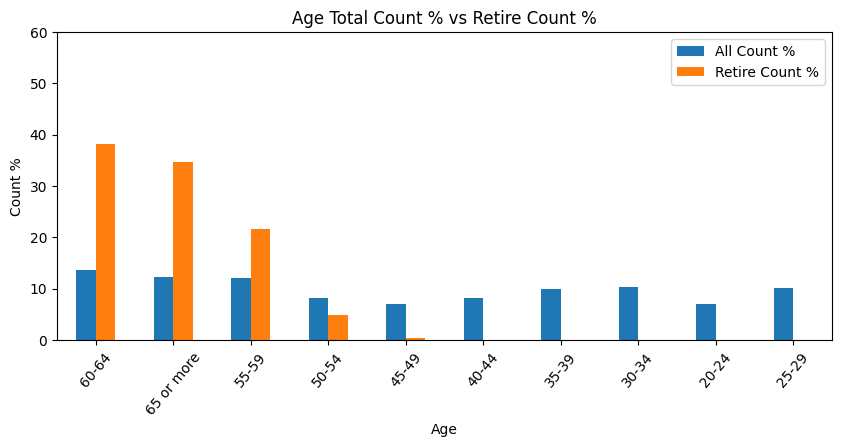

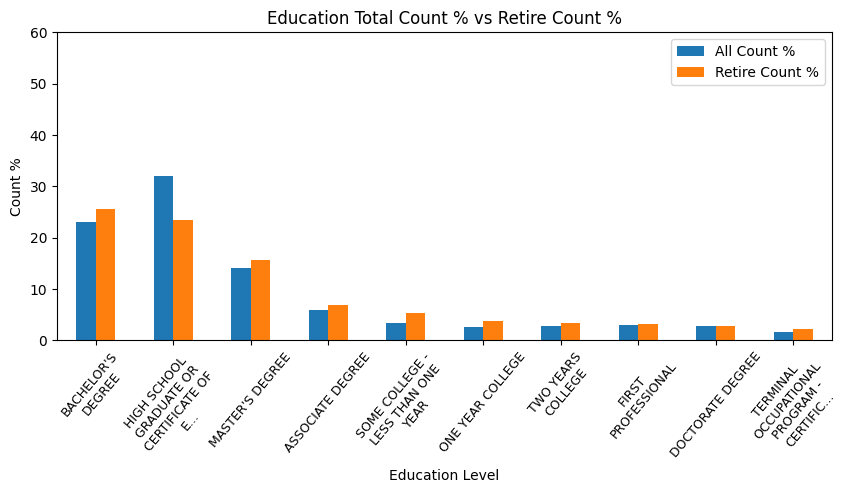

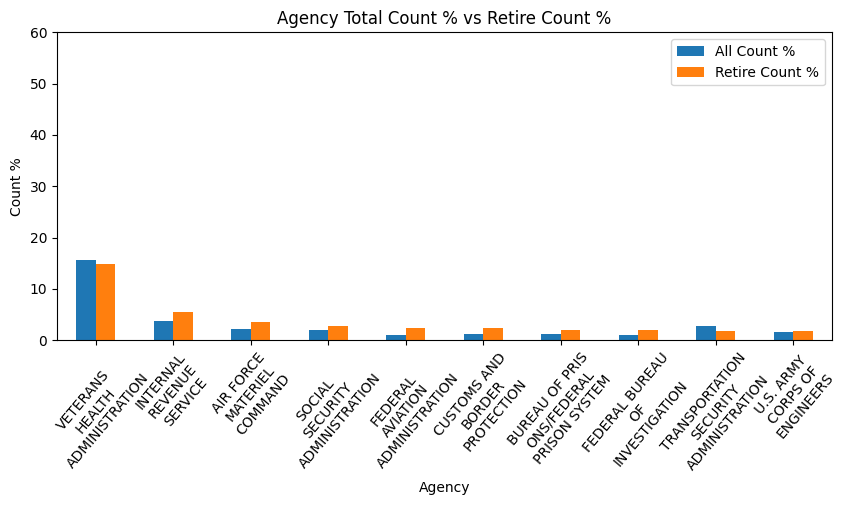

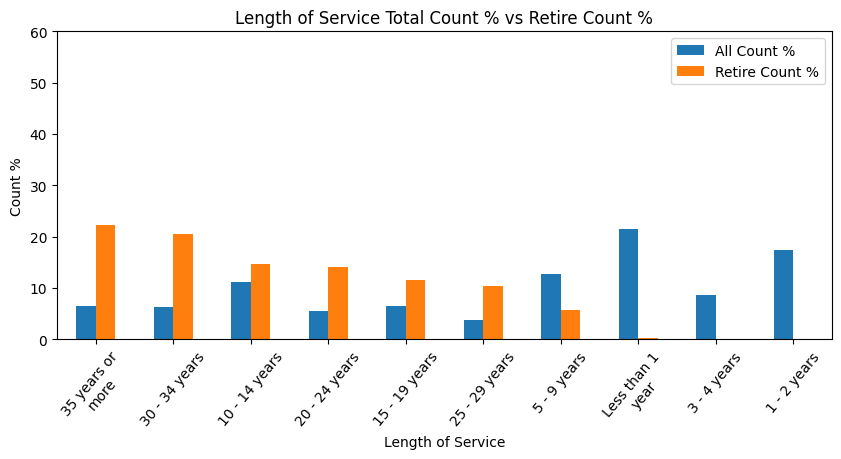

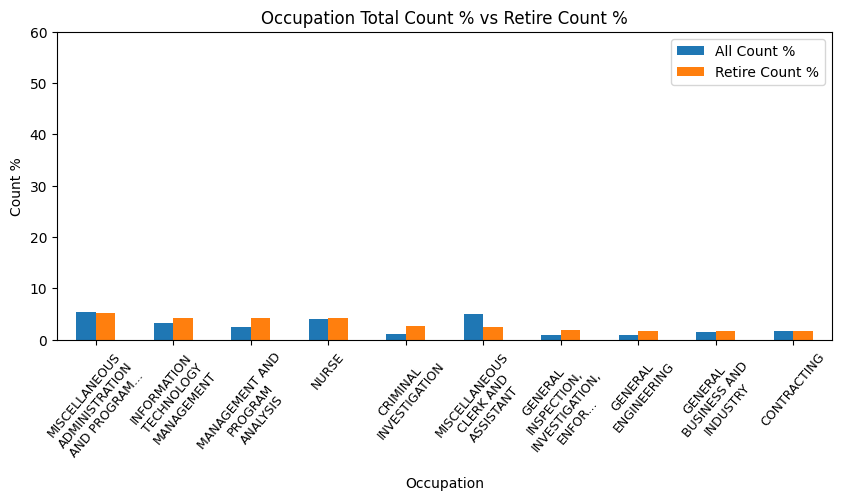

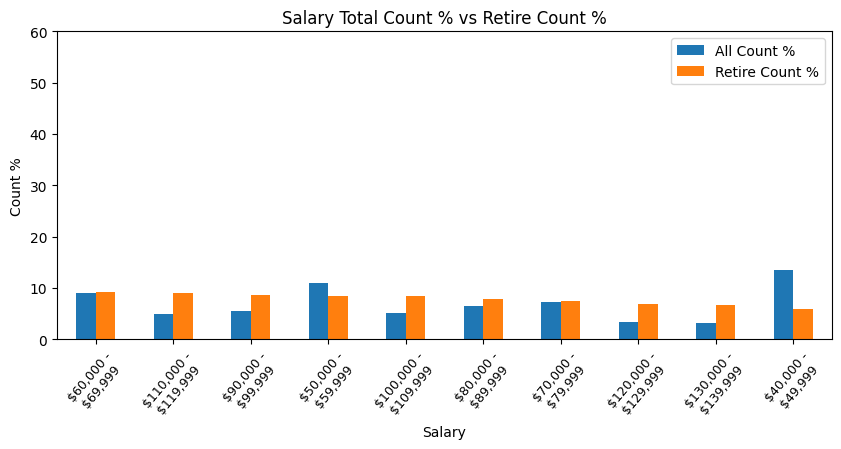

In [75]:
render_relate_graph('SEP', 'Retirement - Voluntary', 'AGELVL', 'Retire', 10, title='Age Total Count % vs Retire Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Age')
ax = render_relate_graph('SEP', 'Retirement - Voluntary', 'EDLVL', 'Retire', 10, title='Education Total Count % vs Retire Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Education Level')
f = lambda x: textwrap.fill(x.get_text(), 16)
ax.set_xticklabels(map(f, ax.get_xticklabels()), fontsize=9, rotation=50)
plt.show()
render_relate_graph('SEP', 'Retirement - Voluntary', 'AGYSUB', 'Retire', 10, title='Agency Total Count % vs Retire Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Agency')
render_relate_graph('SEP', 'Retirement - Voluntary', 'LOSLVL', 'Retire', 10, title='Length of Service Total Count % vs Retire Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Length of Service')
ax = render_relate_graph('SEP', 'Retirement - Voluntary', 'OCC', 'Retire', 10, title='Occupation Total Count % vs Retire Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Occupation')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()
ax = render_relate_graph('SEP', 'Retirement - Voluntary', 'SALLVL', 'Retire', 10, title='Salary Total Count % vs Retire Count %', figsize=(10, 4), ylim=(0, 60), xlabel='Salary')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()

Finally, generate line graphs to potentially reveal some more direct correlation among the few numerical values we have.

<Axes: title={'center': 'Average Salary for Length of Service'}, xlabel='LOS', ylabel='Avg. Salary ($)'>

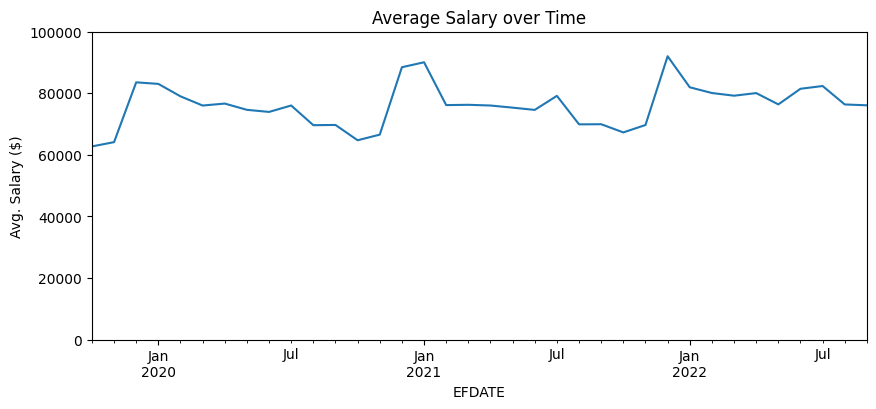

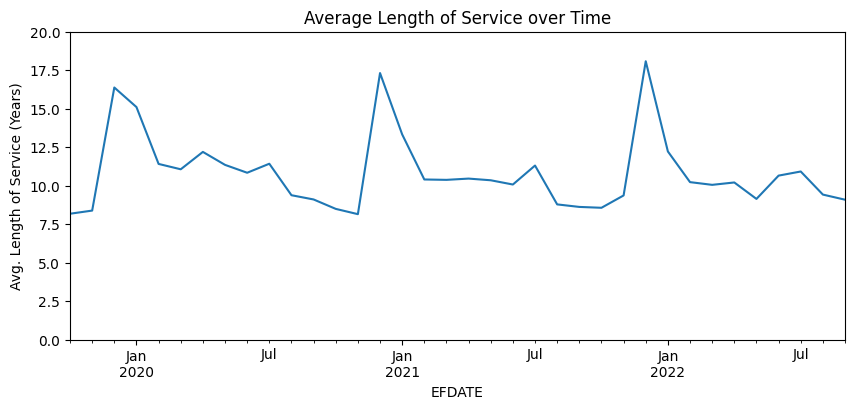

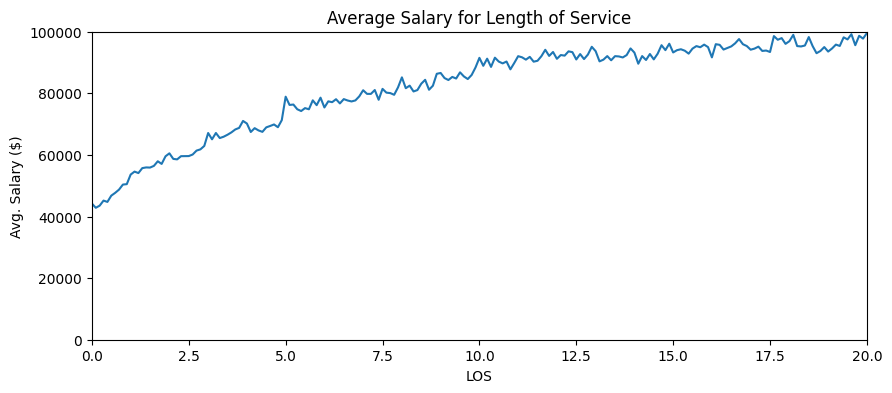

In [98]:
date_group = data[['EFDATE', 'SALARY', 'LOS']].groupby('EFDATE').mean().sort_index()
date_group.plot(y='SALARY', figsize=(10, 4), ylim=(0, 100000), legend=False, ylabel='Avg. Salary ($)', title='Average Salary over Time')
date_group.plot(y='LOS', figsize=(10, 4), ylim=(0, 20), legend=False, ylabel='Avg. Length of Service (Years)', title='Average Length of Service over Time')
los_group = data[['LOS', 'SALARY']].groupby('LOS').mean().sort_index()
los_group.plot(figsize=(10, 4), ylim=(0, 100000), xlim=(0, 20), legend=False, ylabel='Avg. Salary ($)', title='Average Salary for Length of Service')